# K - Means

**K-Means** es otro algoritmo no-supervisado para dividir un número de observaciones en determinados grupos.

Ahora no vamos a establecer una clustericación jerárquica ni realizar un dendrograma.

Vamos a dividir los datos en *k* grupos. El problema que tiene *k-means* es que el número de grupos *k* tiene que ser conocido, e incluso el método necesita evaluar, calcular o definir los baricentros, los centro de gravedad ( centroides ) que forman parte de la etapa inicial del modelo.

### Distancia

La distancia intracluster para un cluster $C_j$ cualquiera como:

$$
SS_w (C_j) = \Sigma_{x \in C_j} (x - c_j)^2
$$

También podemos usar la distancia intracluster normalizada para validar la eficacia del modelo.

$$
S\tilde{S}_w (C_j) = \Sigma_{j = 1}^k \frac{SS_w (C_j)}{SS_T} \ donde\ SS_T = \Sigma_{i = 1}^n(x_i - \overline{x})^2
$$

El objetivo de *k-means* es obtener una configuración de centroides del cluster de modo que la suma total de cuadrados siguiente $SS_w$ sea mínima.

$$
SS_w(k) = \Sigma_{j = 1}^k SS_w (C_j) = \Sigma_{j=1}^k\Sigma_{x_i \in C_j} (x_i - c_j)^2
$$

* k : número de clusters
* $x_i$ son los puntos que pertenecen al cluster j-ésimo.
* $C_j$ es el centroide del cluster j-ésimo.

##### k-means en Python

In [1]:
# clustering libraries
from sklearn import cluster as skcl
from scipy import cluster as scl
from sklearn import datasets

# standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# seaborn style
sns.set()

In [2]:
import sys

# special functions
sys.path.insert(0, "../myfunctions/")

import kmeans_silueta as silueta

### Datos 

Vamos a utilizar dos datasets para tener una mejor comprensión de lo que está ocurriendo. Para ello usaremos el dataset *iris* y el dataset *wine quality*

##### Dataset wine quality

In [3]:
df_wine = pd.read_csv("../../datasets/wine/winequality-red.csv", sep=";")
df_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Para una posterior determinación del número de clusters, vamos a visualizar la frecuencia de las distintas categorías en las que se ha clasificado la calidad del vino.

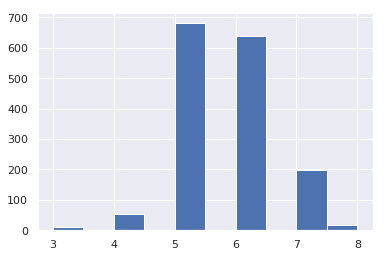

In [4]:
# Calidad
plt.hist(df_wine['quality'])
plt.show()

Ahora podemos observar las distintas medias de cada variable para cada calidad. Así podremos decidir que variables son las que más varían respecto a la clasificación de la calidad.

In [5]:
df_wine.groupby('quality').mean()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
quality,,,,,,,,,,,
3,8.360000,0.884500,0.171000,2.635000,0.122500,11.000000,24.900000,0.997464,3.398000,0.570000,9.955000
4,7.779245,0.693962,0.174151,2.694340,0.090679,12.264151,36.245283,0.996542,3.381509,0.596415,10.265094
5,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706
6,8.347179,0.497484,0.273824,2.477194,0.084956,15.711599,40.869906,0.996615,3.318072,0.675329,10.629519
7,8.872362,0.403920,0.375176,2.720603,0.076588,14.045226,35.020101,0.996104,3.290754,0.741256,11.465913
8,8.566667,0.423333,0.391111,2.577778,0.068444,13.277778,33.444444,0.995212,3.267222,0.767778,12.094444


Una vez hemos hecho una pequeña investigación del conjunto de datos, hemos observado que algunas variables tienen saltos de rangos muy grandes.

Para evitar estos saltos de rangos vamos a normalizar los datos.

##### Dataset Iris

In [6]:
iris = datasets.load_iris()

In [7]:
# Valores del target
target = np.where(iris.target == 0, iris.target_names[0], iris.target)
target = np.where(iris.target == 1, iris.target_names[1], target)
target = np.where(iris.target == 2, iris.target_names[2], target)
np.unique(target)

array(['setosa', 'versicolor', 'virginica'], dtype='<U21')

In [8]:
# Dataframe
df_iris = pd.DataFrame(data=np.c_[iris.data, target],
                  columns=iris.feature_names + ['species'])
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
df_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null object
sepal width (cm)     150 non-null object
petal length (cm)    150 non-null object
petal width (cm)     150 non-null object
species              150 non-null object
dtypes: object(5)
memory usage: 5.9+ KB


In [10]:
df1_iris = df_iris.drop('species', axis= 1).apply(pd.to_numeric)
df1_iris['species'] = df_iris['species']
df1_iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


##### Biblioteca sklearn

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
# Instanciamos la clase
sc_X = StandardScaler()

# usamos el método fit para el conjunto de entrenamiento
df_wine_sc = sc_X.fit_transform(df_wine)
df_wine_scaler = pd.DataFrame(df_wine_sc, columns=df_wine.columns)
df_wine_scaler.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823
1,-0.298547,1.967442,-1.391472,0.043416,0.223875,0.872638,0.624363,0.028261,-0.719933,0.128950,-0.584777,-0.787823
2,-0.298547,1.297065,-1.186070,-0.169427,0.096353,-0.083669,0.229047,0.134264,-0.331177,-0.048089,-0.584777,-0.787823
3,1.654856,-1.384443,1.484154,-0.453218,-0.264960,0.107592,0.411500,0.664277,-0.979104,-0.461180,-0.584777,0.450848
4,-0.528360,0.961877,-1.391472,-0.453218,-0.243707,-0.466193,-0.379133,0.558274,1.288643,-0.579207,-0.960246,-0.787823


##### Normalización a mano

In [13]:
df_wine_norm = (df_wine - df_wine.min()) / (df_wine.max() - df_wine.min())
df_wine_norm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4
1,0.283186,0.520548,0.00,0.116438,0.143573,0.338028,0.215548,0.494126,0.362205,0.209581,0.215385,0.4
2,0.283186,0.438356,0.04,0.095890,0.133556,0.197183,0.169611,0.508811,0.409449,0.191617,0.215385,0.4
3,0.584071,0.109589,0.56,0.068493,0.105175,0.225352,0.190813,0.582232,0.330709,0.149701,0.215385,0.6
4,0.247788,0.397260,0.00,0.068493,0.106845,0.140845,0.098940,0.567548,0.606299,0.137725,0.153846,0.4


###### Iris dataset

In [14]:
# Instanciamos la clase
sc2_X = StandardScaler()

# usamos el método fit para el conjunto de entrenamiento
df1_iris_sc = sc2_X.fit_transform(df1_iris.drop('species', axis = 1))
df1_iris_scaler = pd.DataFrame(df1_iris_sc, columns=df1_iris.drop('species', axis = 1).columns)
df1_iris_scaler.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977


## Número óptimo de clusters

### Método del codo 

El método del codo nos permite conocer el número de clusters óptimo. Para ello representamos el número de clusters frente a WCSS. El valor óptimo es aquel que tiene el menor número de clusters y el menor valor de WCSS

##### Iris dataset

In [15]:
# selección de datos
X_iris = df1_iris_scaler.values

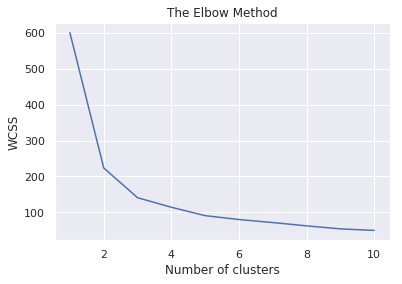

In [16]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = skcl.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_iris)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##### Wine dataset

In [17]:
X_wines = df_wine_scaler.drop('quality', axis = 1).values

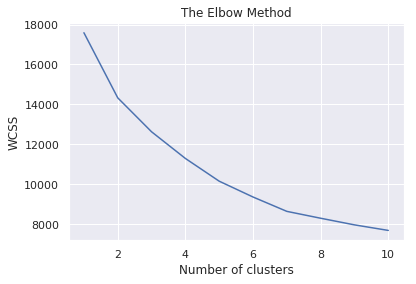

In [18]:
# Using the elbow method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = skcl.KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_wines)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Método de la silueta

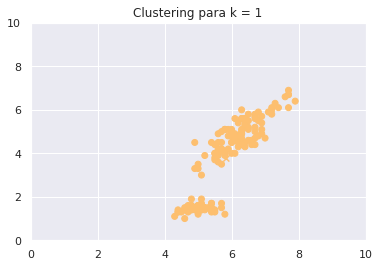

* Para k =  2  el promedio de la silueta es de : 0.7096825580948182
   - Para i =  1  la silueta del cluster vale :  0.660103182847278
   - Para i =  2  la silueta del cluster vale :  0.7978236696460003


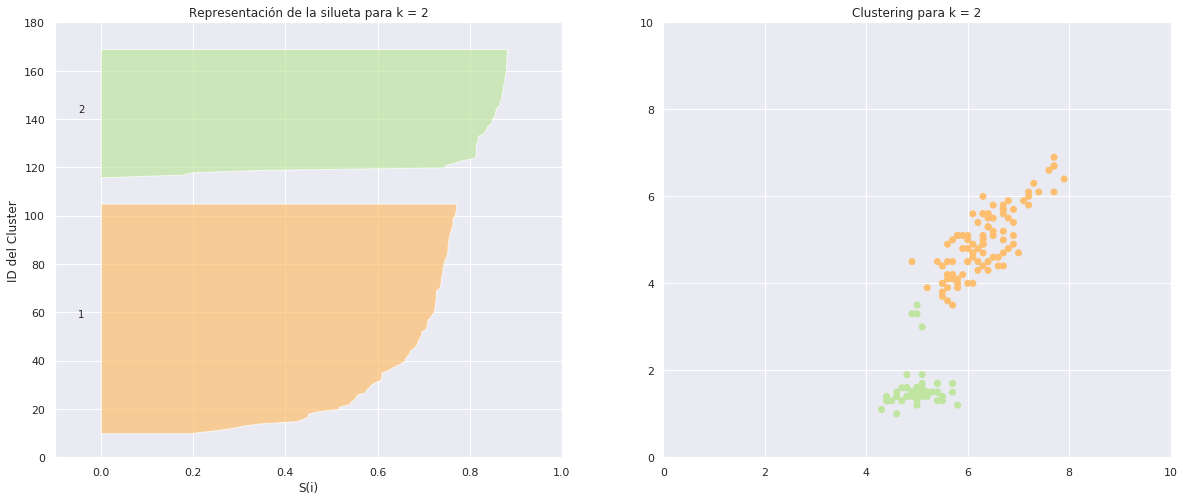

* Para k =  3  el promedio de la silueta es de : 0.5890612474062568
   - Para i =  1  la silueta del cluster vale :  0.4785976766951445
   - Para i =  2  la silueta del cluster vale :  0.8229607278058059
   - Para i =  3  la silueta del cluster vale :  0.45437865230546415


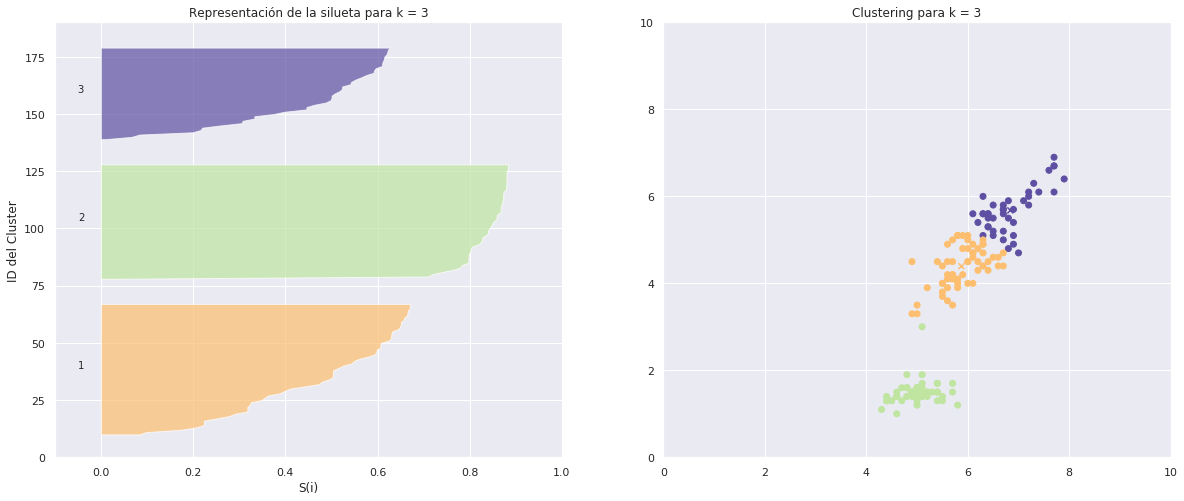

In [33]:
# Datos
x1 = df1_iris['sepal length (cm)'].values
x2 = df1_iris['petal length (cm)'].values

X = np.array(list(zip(x1, x2)))

# silueta
silueta.silueta(3, X, x1, x2)

## Clustering jerárquico con scikit-learn

##### Biblioteca scikit

In [20]:
from sklearn import cluster

In [21]:
clus = cluster.AgglomerativeClustering(n_clusters=6,
                                         linkage='ward',
                                         ).fit(df_wine_norm)

In [22]:
md_h = pd.Series(clus.labels_)

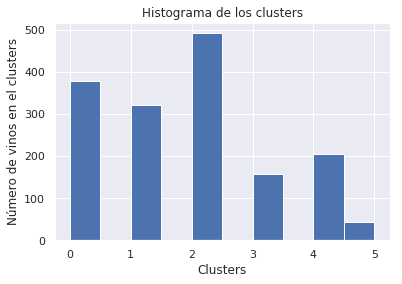

In [23]:
plt.hist(md_h)
plt.title("Histograma de los clusters")
plt.xlabel("Clusters")
plt.ylabel("Número de vinos en el clusters")
plt.show()

In [24]:
z_norm = scl.hierarchy.linkage(df_wine_norm, 'ward')
z_scaler = scl.hierarchy.linkage(df_wine_scaler, 'ward')

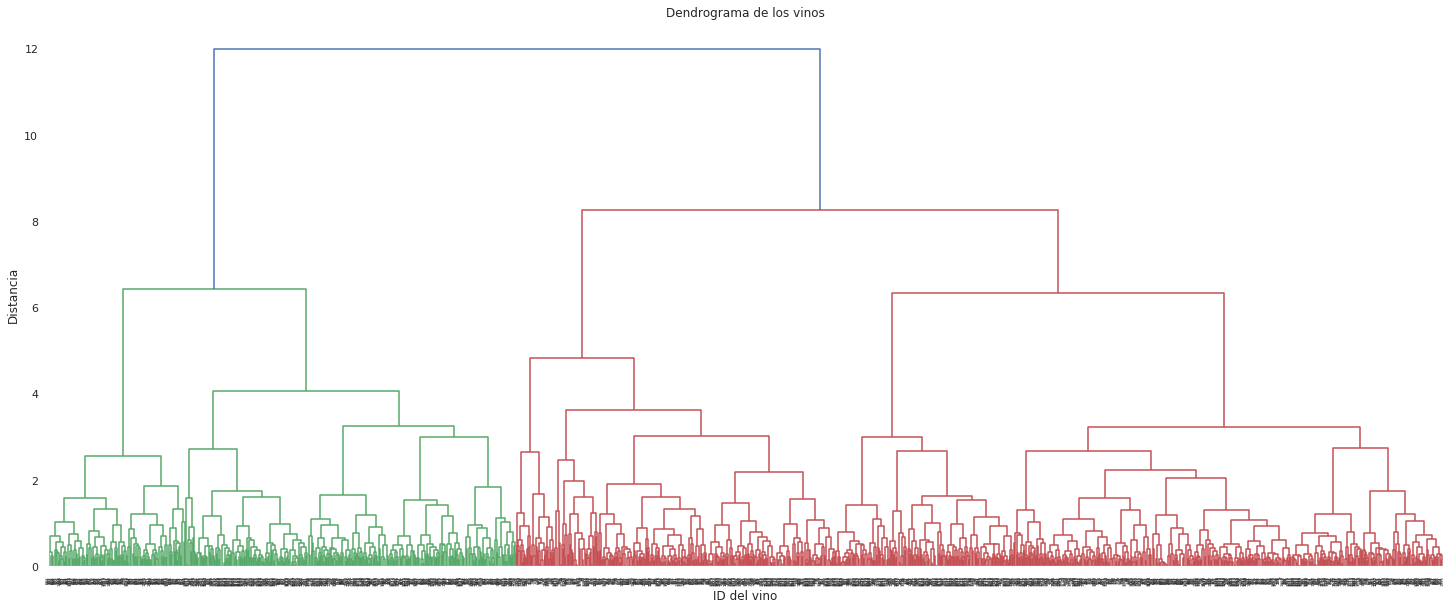

In [25]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
scl.hierarchy.dendrogram(z_norm, leaf_rotation=90., leaf_font_size=4.)
plt.show()

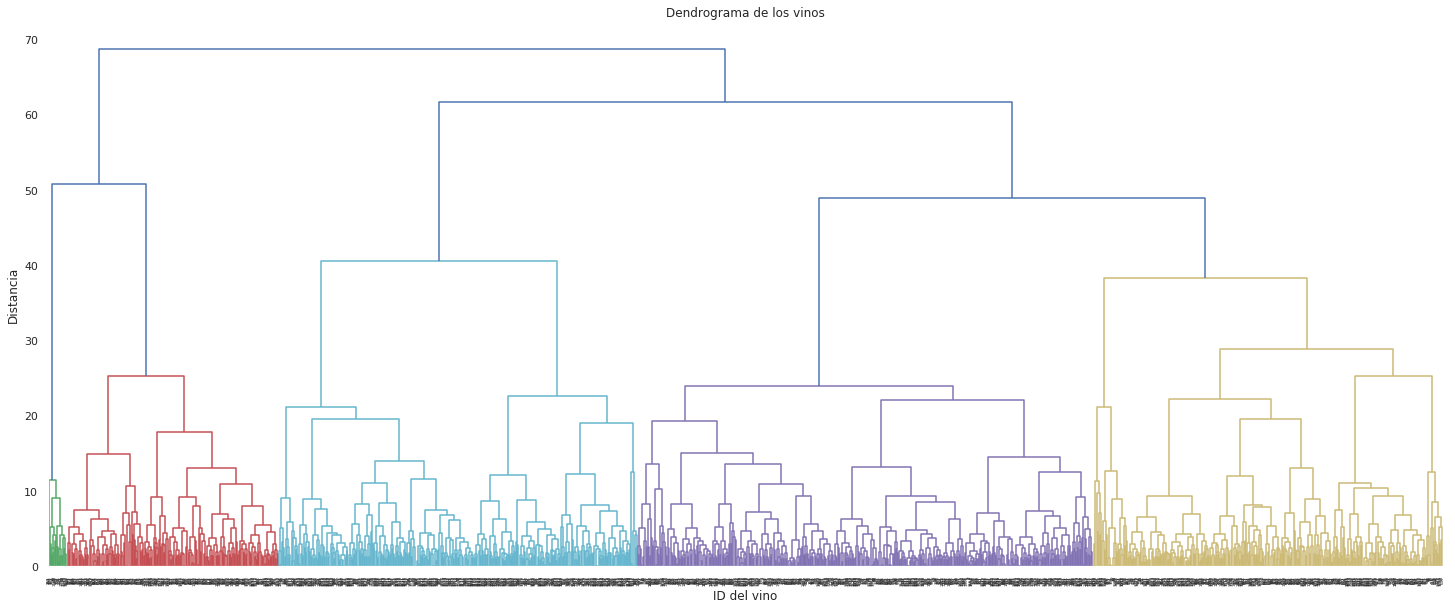

In [26]:
plt.figure(figsize=(25,10))
plt.title("Dendrograma de los vinos")
plt.xlabel("ID del vino")
plt.ylabel("Distancia")
scl.hierarchy.dendrogram(z_scaler, leaf_rotation=90., leaf_font_size=4.)
plt.show()

## K - Means

In [27]:
# Create a KMeans model with 3 clusters: model
model = skcl.KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(X_iris)

# Create a DataFrame with clusters and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'species': target})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)

species  setosa  versicolor  virginica
labels                                
0             0          11         33
1            50           0          0
2             0          39         17


In [28]:
model_fit = model.fit(df1_iris_scaler)

In [29]:
md_k = pd.Series(model_fit.labels_)

In [30]:
df1_iris_scaler['clust_h'] = md_h
df1_iris_scaler['clust_k'] = md_k
df1_iris_scaler.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clust_h,clust_k
0,-0.900681,1.032057,-1.341272,-1.312977,2,1
1,-1.143017,-0.124958,-1.341272,-1.312977,2,1
2,-1.385353,0.337848,-1.398138,-1.312977,2,1
3,-1.506521,0.106445,-1.284407,-1.312977,3,1
4,-1.021849,1.263460,-1.341272,-1.312977,2,1


## Interpretación final

In [31]:
df1_iris_scaler.groupby("clust_k").mean()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),clust_h
clust_k,,,,,
0,-0.050220,-0.880292,0.347532,0.282063,2.169811
1,-1.014579,0.842307,-1.304878,-1.255129,2.160000
2,1.135970,0.096598,0.996271,1.017172,2.085106


In [32]:
df_norm.groupby("clust_h").mean()

NameError: name 'df_norm' is not defined